# Project 2: Runge-Kutta Fehlberg for ODE
Kayla Zantello and Lucio Infante

This program calculates and plots the solution to an ordinary differential equation using the Runge-Kutta-Fehlberg method, as well as the odeint function, then compares the results.
### Packages used
1. NumPy  
2. SciPy  
3. Matplotlib  
4. Jupyter

### Approach to implementation
##### ODE to be solved:
$$
f(x, y) = y' = \frac{y}{e^x - 1}
$$
with initial conditionals $ x_0 = 1, y_0 = 5 $ and step size $ h = 0.02 $
##### Part 1
Use a for loop to calculate the k values and apply them to the recurrence formulas, starting with the initial conditionals. Loop will calculate x and y values for 1000 iterations.
##### Part 2
Use SciPy.integrate's odeint function to plot solution using the initial conditionals and model function that returns the solution to the equation shown above.

See comments for further explanation.

## Part 1 - Solve using RKF
The Runge-Kutta-Fehlberg method is a fourth order approximation.

For an ODE
$$
\frac{dy}{dx} = f(x, y)
$$
with initial conditionals $ x = x_0, y = y_0 $ and step size $ h $, the recurrence formulas are,
$$
x_{n+1} = x_n + h
$$
$$
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$
where,
$$
k_1 = f(x, y)
$$
$$
k_2 = f(x + \frac{h}{2}, y + \frac{h}{2}k_1)
$$
$$
k_3 = f(x + \frac{h}{2}, y + \frac{h}{2}k_2)
$$
$$
k_4 = f(x + h, y + hk_3)
$$

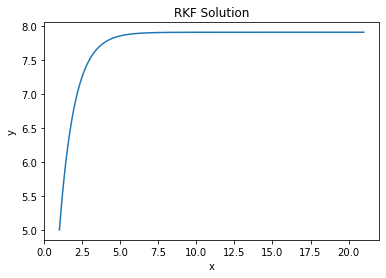

Computational Time - RKF:
0.08523710002191365


In [21]:
# import necessary packages
import numpy as np  # import numpy under the name np
from scipy.integrate import odeint  # import the odeint function from scipy integrate package
import matplotlib.pyplot as plt  # import matplotlib pyplot package under the name plt
import timeit  # import timeit package to calculate computational time

# record time at start of program
startRKF = timeit.default_timer()

# define initial conditionals
x0 = 1
y0 = 5

# define step size
h = 0.02

# initialize lists for values of x and y
x = []
y = []

# insert each initial conditional into its respective list
x.append(x0)
y.append(y0)

# define ODE to solve
def func(xi, yi):
    # return value of y'
    return yi / (np.exp(xi) - 1)

# define range of n for the solutions (xn, yn) of the ODE
myRange = range(0, 1000)  # program will use RKF method to calculate solutions (x0, y0) to (x1000, y1000)

for n in myRange:
    # first, calculate k1, k2, k3, k4
    k1 = func(x[n], y[n])
    k2 = func(x[n] + h/2, y[n] + h/2 * k1)
    k3 = func(x[n] + h/2, y[n] + h/2 * k2)
    k4 = func(x[n] + h, y[n] + h * k3)

    # next, apply k values to recurrence formula
    x.append(x[n] + h)
    y.append(y[n] + (h/6)*(k1 + 2*k2 + 2*k3 + k4))

# plot the results
plt.plot(x, y)
plt.title("RKF Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# record the time at the end of the program
endRFK = timeit.default_timer()

# display the computational time of the program
print("Computational Time - RKF:")
print(endRFK - startRKF)


## Part 2 - Solve using ODEINT
SciPy.integrate's odeint function takes in a model function, an initial condition for y, and an array of x-values to report the solution at.

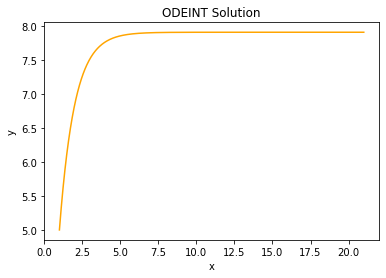

Computational Time - ODEINT:
0.2399663000833243


In [22]:
# record time at start of program
startODEINT = timeit.default_timer()

# define function to calculate given derivative
def model(yi, xi):
    return yi / (np.exp(xi) - 1)

# create array for x values to report solution at - 1000 values from 1 to 21 to mimic part 1
xr = np.linspace(1, 21, 1000)

# assign initial condition for y
yinit = 5.0

# solve ODE
ys = odeint(model, yinit, xr)

timeit.timeit('"-".join(str(n) for n in range(100))', number=10000)

# plot the results
plt.plot(xr, ys, "orange")
plt.title("ODEINT Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# record time at end of program
endODEINT = timeit.default_timer()

# display the computational time of the program
print("Computational Time - ODEINT:")
print(endODEINT - startODEINT)

## Plotting solutions of both methods together
Solutions from parts 1 and 2 are plotted together here to show the accuracy of the RKF method.

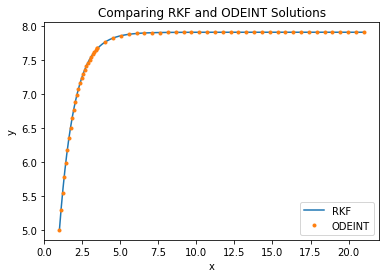

In [23]:
# shrink array of x values to report solution at from 1000 values to 60 for easier viewing
arr1 = np.linspace(1, 3.5, 25)
arr2 = np.linspace(3.5, 21, 35)
xr = np.append(arr1, arr2)

# solve ODE using new xr array
ys = odeint(model, yinit, xr)

# plot the results
plt.plot(x, y, label = "RKF")  # plot solution from part 1 (RKF)
plt.plot(xr, ys, '.', label = "ODEINT")  # plot solution from part 2 (odeint)
plt.title("Comparing RKF and ODEINT Solutions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()  # display legend for methods
plt.show()

## RKF True Solutions
Solutions for n = 0 through n = 5 that were used as the true solution in the documentation

In [24]:
# create array of integers 0 through 5
truesols = range(0, 6)

# print true solution for each (xn, yn)
for i in truesols:
    print("x" + str(i) + ": " + str(x[i]))
    print("y" + str(i) + ": " + str(y[i]))
    print(" ")

x0: 1
y0: 5
 
x1: 1.02
y1: 5.057619554621473
 
x2: 1.04
y2: 5.114098165612232
 
x3: 1.06
y3: 5.169458425170396
 
x4: 1.08
y4: 5.22372247813853
 
x5: 1.1
y5: 5.276912030861883
 
